<a href="https://colab.research.google.com/github/VilchisKarla/SIMULACION-I/blob/main/Box_Muller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método Box-Muller**
Vilchis García Karla Ivonne


---

Es un método para generar desviaciones normales a partir de 2 números aleatorios, ofreciendo mayor precisión y velocidad favorable.


1. Generar $U_1, U_2  \sim U(0,1)$

2. Hacer: $\quad R=\sqrt{-2lnU_1}\qquad , \qquad \theta=2\pi  U_2$

3. Hacer: $\quad X=Rcos(\theta) \qquad ,\quad Y=Rsen(\theta)$

4. Salida: $X,Y$


---
## **Desarrollo del método:**

Dados $U_1, U_2 \sim U(0,1)$ v.a. independientes

tomando $R=\sqrt{-2lnU_1}\quad$ y $\quad \theta=2\pi U_2$
$$X=Rcos(\theta) \qquad - - - - -(1)$$
$$Y=Rsen(\theta) \qquad - - - - -(1)$$
$$\mu=0 \qquad \sigma^2=1$$

dado que tienen la forma polar, podemos obtener las relaciones inversas, ya que sabemos lo siguiente:
$$R=\sqrt{X^2+Y^2}$$
$$⇒ \quad -2lnU_1=X^2+Y^2$$
$$\therefore \quad U_1=e^{-\frac{X^2+Y^2}{2}}$$

Ahora
$$\theta = arctan(\frac{Y}{X})$$
$$⇒ \quad 2\pi U_2=arctan(\frac{Y}{X})$$
$$\therefore \quad U_2=\frac{1}{2\pi}arctan(\frac{Y}{X})$$

Así para la densidad conjunta, sabemos que $U_1 \quad y \quad U_2$  son independientes y uniformes
$⇒ \quad f(U_1,U_2)=1$

Ahora, usando: $f(X,Y)=f(U_1,U_2)\cdot |det J^{-1}|$

$$f(X,Y)=\frac{1}{2\pi}e^{-\frac{X^2+Y^2}{2}}=\frac{1}{2\pi}e^{-\frac{X^2}{2}}⋅ \frac{1}{2\pi}e^{-\frac{Y^2}{2}}=f(X)f(Y)$$

Nota: la densidad $f(X,Y)$ es constante en círculos, así $\theta=\frac{Y}{X}$ se distribuye uniformemente en (0,2π), R^2=x^2+y^2 tiene distribución χ^2 con 2 grados de libertad.

     

*   Si U ∈ (0,1) ⇒ -2lnU tiene distribución χ^2 con 2 grados de libertad (procediendo de manera inversa llegamos a (1))




---

## **Generalización**

De la distribución χ^2 con 2k grados de libertad se pueden generar sumando los k términos
$$\sum_{i=1}^k (-2lnU_i)$$

Para k+1 grados de libertad se puede añadir el cuadrado de una desviación normal generada por el método anterior



---

## **Surguimiento del método**
Surge del deseo de generar desviaciones normales que fueran confiables en las colas de la distribución, dado que la mayoría de computadoras cuenta con bibliotecas de programación como funciones: trigonométricas, logs, raíces, etc. Este enfoque requiere poca programación adicional.

La precisión dependerá esencialmente de la exactitud de las bibliotecas.

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def BM(n):
    lista=[]
    for _ in range(n):
        u1=rd.random()
        u2=rd.random()
        r = np.sqrt(-2*np.log(u1))
        theta=2*np.pi*u2
        x=r*np.cos(theta)
        y=r*np.sin(theta)
        lista.append(x)
        lista.append(y)
    return lista

In [3]:
xy = BM(100000)

**Valores teóricos**

$\mu = 0$

$σ^2 = 1 \quad ⇒ \quad  σ=1$

In [4]:
print("media x:", np.mean(xy))
print("varianza x:", np.var(xy))
print("desviación estandar x:", np.std(xy))

media x: 0.0008447451753190168
varianza x: 0.9996671531790514
desviación estandar x: 0.9998335627388447


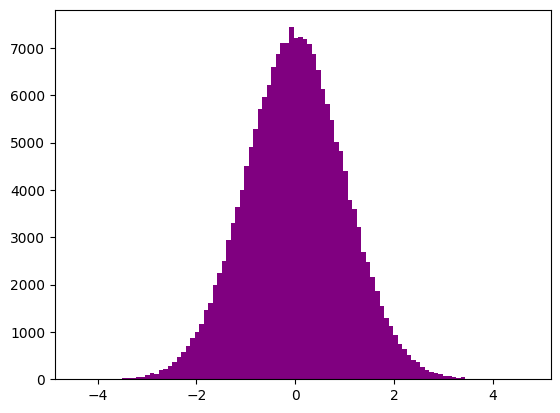

In [5]:
#gráfica
plt.hist(xy, bins=100, color='purple')
plt.show()